# Visualization of my Snapchat conversation history.

In [122]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [123]:
with open('/content/chat_history.json') as json_file:
  data = json.load(json_file)

In [124]:
# Get all items in dataset
for item in data:
  print(item)

Received Saved Chat History
Sent Saved Chat History
Received Unsaved Chat History
Sent Unsaved Chat History


# We are going to start with received chat history.

In [125]:
# Combine saved and unsave chat into one larger data frame
#   for complete received chat histroy
dfReceived = pd.DataFrame(data['Received Saved Chat History'] + 
                  data['Received Unsaved Chat History'])

In [126]:
# Before showing data we will be doing some preprocessing

In [127]:
for col in dfReceived.columns:
    print(col)

From
Media Type
Created
Text


#### Preprocessing for privacy

In [128]:
# Starting with 'From'

users = []
# Get all users in dfReceived['From']
for user in dfReceived['From']:
  if user in users:
    pass
  else:
    users.append(user)
#print(users)

# Replace names for privacy
x = 0
for user in users:
  dfReceived['From'].replace(user, f'user{x}', inplace=True)
  x+=1

# Now replace all messages in df['Text']
dfReceived['Text'] = 'message'

In [129]:
dfReceived.head()

,From,Media Type,Created,Text
0,user0,TEXT,2022-09-18 03:33:18 UTC,message
1,user0,TEXT,2022-09-18 03:27:38 UTC,message
2,user0,TEXT,2022-09-18 03:13:42 UTC,message
3,user0,TEXT,2022-09-18 02:57:38 UTC,message
4,user0,TEXT,2022-09-18 02:57:32 UTC,message


In [130]:
dfReceived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188984 entries, 0 to 188983
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   From        188984 non-null  object
 1   Media Type  188984 non-null  object
 2   Created     188984 non-null  object
 3   Text        188984 non-null  object
dtypes: object(4)
memory usage: 5.8+ MB


In [131]:
dfReceived.describe()

,From,Media Type,Created,Text
count,188984,188984,188984,188984
unique,50,6,185894,1
top,user12,TEXT,2018-06-14 21:05:24 UTC,message
freq,182511,141916,11,188984


In [132]:
messageReceivedFrequency = dfReceived['From'].value_counts()
print(messageReceivedFrequency)

user12    182511
user14      1558
user4       1417
user6       1201
user29       474
user16       406
user20       193
user5        132
user26       118
user31       101
user28        94
user13        84
user48        83
user47        65
user9         56
user44        52
user19        41
user8         34
user17        34
user25        31
user11        30
user0         27
user24        23
user33        22
user23        21
user15        21
user1         15
user7         13
user2         12
user39        11
user46        11
user40        10
user18        10
user30         9
user37         7
user22         7
user35         6
user21         6
user42         5
user45         5
user38         5
user43         4
user3          4
user41         3
user32         3
user34         3
user49         2
user10         2
user27         1
user36         1
Name: From, dtype: int64


# Received Visualization

Text(0, 0.5, 'Messages received')

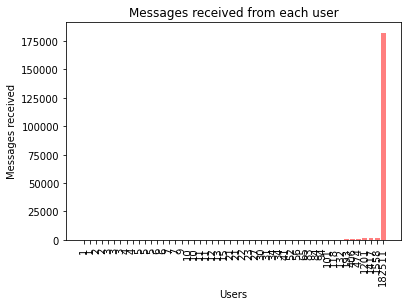

In [144]:
sort = sorted(messageReceivedFrequency)
names = [name for name in sort]
plt.bar(range(len(messageReceivedFrequency)), sort, color='red', alpha=0.5, tick_label=names)
plt.title('Messages received from each user')
plt.xlabel('Users')
plt.xticks(rotation=90)
plt.ylabel('Messages received')

As you can see we have an outlier that makes it hard to see the rest of the data.
We will remove this outlier to better vizualize the rest of the data.

In [145]:
messageReceivedFrequencyCleaned = dfReceived['From'].loc[lambda x: x !='user12'].value_counts()
print(messageReceivedFrequencyCleaned)

user14    1558
user4     1417
user6     1201
user29     474
user16     406
user20     193
user5      132
user26     118
user31     101
user28      94
user13      84
user48      83
user47      65
user9       56
user44      52
user19      41
user8       34
user17      34
user25      31
user11      30
user0       27
user24      23
user33      22
user23      21
user15      21
user1       15
user7       13
user2       12
user39      11
user46      11
user40      10
user18      10
user30       9
user37       7
user22       7
user35       6
user21       6
user42       5
user45       5
user38       5
user43       4
user3        4
user41       3
user32       3
user34       3
user49       2
user10       2
user27       1
user36       1
Name: From, dtype: int64


Text(0, 0.5, 'Messages received')

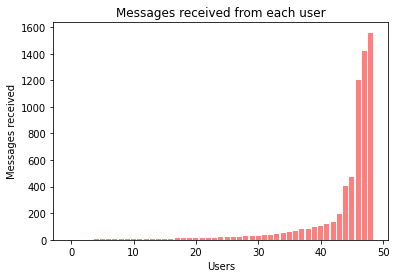

In [146]:
plt.bar(range(len(messageReceivedFrequencyCleaned)), sorted(messageReceivedFrequencyCleaned), color='red', alpha=0.5)
plt.title('Messages received from each user')
plt.xlabel('Users')
plt.ylabel('Messages received')

# Now lets take a look at sent chat history.

In [136]:
# Lets go through the same process we did earlier.
dfSent = pd.DataFrame(data['Sent Saved Chat History'] + 
                  data['Sent Unsaved Chat History'])

In [137]:
for col in dfSent.columns:
    print(col)

To
Media Type
Created
Text


In [138]:
users = []
# Get all users in dfSent['To']
for user in dfSent['To']:
  if user in users:
    pass
  else:
    users.append(user)
#print(users)

# Replace names for privacy
x = 0
for user in users:
  dfSent['To'].replace(user, f'user{x}', inplace=True)
  x+=1

# Now replace all messages in df['Text']
dfSent['Text'] = 'message'

In [139]:
dfSent.head()

,To,Media Type,Created,Text
0,user0,TEXT,2022-09-18 03:35:37 UTC,message
1,user0,TEXT,2022-09-18 03:31:01 UTC,message
2,user0,TEXT,2022-09-18 03:30:32 UTC,message
3,user0,TEXT,2022-09-18 03:00:03 UTC,message
4,user0,TEXT,2022-09-18 03:00:00 UTC,message


In [140]:
dfSent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149318 entries, 0 to 149317
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   To          149318 non-null  object
 1   Media Type  149318 non-null  object
 2   Created     149318 non-null  object
 3   Text        149318 non-null  object
dtypes: object(4)
memory usage: 4.6+ MB


In [141]:
dfSent.describe()

,To,Media Type,Created,Text
count,149318,149318,149318,149318
unique,53,6,148083,1
top,user9,TEXT,2018-06-23 21:17:07 UTC,message
freq,141416,127828,8,149318


In [147]:
messageSentFrequency = dfSent['To'].value_counts()
print(messageSentFrequency)

user9     141416
user8       2033
user5       1976
user13      1518
user26       569
user17       234
user25       191
user10       176
user14       119
user21       102
user2         99
user11        99
user50        98
user15        91
user7         67
user12        66
user16        62
user49        59
user45        49
user24        46
user1         25
user23        25
user20        23
user30        23
user6         13
user35        13
user0         12
user22        11
user48        11
user42        11
user40         9
user39         8
user47         8
user19         8
user28         7
user3          6
user27         5
user41         4
user37         3
user34         3
user33         3
user44         3
user4          2
user29         2
user52         2
user38         1
user36         1
user43         1
user18         1
user46         1
user32         1
user31         1
user51         1
Name: To, dtype: int64


Text(0, 0.5, 'Messages sent')

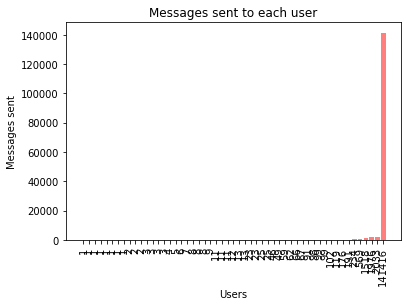

In [153]:
sort = sorted(messageSentFrequency)
names = [name for name in sort]
plt.bar(range(len(messageSentFrequency)), sort, color='red', alpha=0.5, tick_label=names)
plt.title('Messages sent to each user')
plt.xlabel('Users')
plt.xticks(rotation=90)
plt.ylabel('Messages sent')

In [150]:
messageSentFrequencyCleaned = dfSent['To'].loc[lambda x: x !='user9'].value_counts()
print(messageSentFrequencyCleaned)

user8     2033
user5     1976
user13    1518
user26     569
user17     234
user25     191
user10     176
user14     119
user21     102
user2       99
user11      99
user50      98
user15      91
user7       67
user12      66
user16      62
user49      59
user45      49
user24      46
user1       25
user23      25
user20      23
user30      23
user35      13
user6       13
user0       12
user22      11
user48      11
user42      11
user40       9
user19       8
user39       8
user47       8
user28       7
user3        6
user27       5
user41       4
user37       3
user34       3
user33       3
user44       3
user29       2
user4        2
user52       2
user38       1
user36       1
user43       1
user32       1
user46       1
user31       1
user18       1
user51       1
Name: To, dtype: int64


Text(0, 0.5, 'Messages sent')

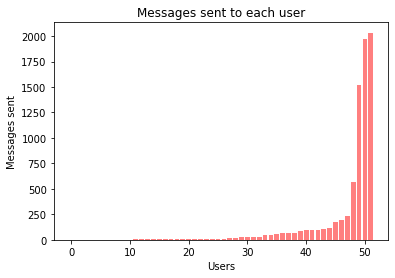

In [154]:
plt.bar(range(len(messageSentFrequencyCleaned)), sorted(messageSentFrequencyCleaned), color='red', alpha=0.5)
plt.title('Messages sent to each user')
plt.xlabel('Users')
plt.ylabel('Messages sent')